In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE  # SMOTE for oversampling minority class
from imblearn.ensemble import EasyEnsembleClassifier  # EasyEnsemble for ensemble learning on imbalanced datasets
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autoencoder-features/top_0.25_percent_features_cv.csv
/kaggle/input/autoencoder-features/top_0.5_percent_features_cv.csv
/kaggle/input/autoencoder-features/top_1.0_percent_features_cv.csv
/kaggle/input/pancancer-8-dataset/genes.csv
/kaggle/input/pancancer-8-dataset/8_cancers_merged.csv
/kaggle/input/pancancer-8-dataset/Preprocessed_8_cancer_genes.csv


In [31]:
df = pd.read_csv('/kaggle/input/pancancer-8-dataset/Preprocessed_8_cancer_genes.csv')
df = df.iloc[:, 1:]
temp = df.iloc[:, :-1]
null_rows = temp[temp.isna().all(axis=1)].index
print(null_rows)
df.drop(index=[1226, 1741, 1917, 2069, 2494, 3084, 3637], inplace=True)
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

Index([1226, 1741, 1917, 2069, 2494, 3084, 3637], dtype='int64')


In [32]:
genes = ['CDK11A',
'TPRG1L',
'CEP104',
'LRRC47',
'GNB1',
'ATAD3B',
'TAS1R1',
'NOC2L',
'TNFRSF14',
'TNFRSF18',
'OR4F5',
'AURKAIP1',
'MRPL20']

In [33]:
X = X[genes]
X.shape

(4104, 13)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [37]:
# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape

(7848, 13)

In [38]:
# Compute class weights for the training data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Example: SVM with class weights
svm_model = SVC(class_weight=class_weight_dict, random_state=42)


In [58]:
# Models setup
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Using class_weight='balanced' to address imbalance
svm_model = SVC(class_weight='balanced', random_state=42)
#xgb_model = XGBClassifier(scale_pos_weight=10, random_state=42)  # Adjust scale_pos_weight if needed
ada_model = AdaBoostClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Training models
rf_model.fit(X_train_resampled, y_train_resampled)
svm_model.fit(X_train_resampled, y_train_resampled)
#xgb_model.fit(X_train_resampled, y_train_resampled)
ada_model.fit(X_train_resampled, y_train_resampled)
lr_model.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [70]:
# Make predictions
rf_preds = rf_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
#xgb_preds = xgb_model.predict(X_test)
ada_preds = ada_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
et_preds = et_model.predict(X_test)
st_preds = stackclassifier.predict(X_test)
soft_voting = eclfs.predict(X_test)

# Evaluate all models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (Macro Average):", precision_score(y_true, y_pred, average='macro'))
    print("Recall (Macro Average):", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score (Macro Average):", f1_score(y_true, y_pred, average='macro'))
    print("\n")

# Evaluate each model
evaluate_model(y_test, rf_preds, 'Random Forest')
evaluate_model(y_test, svm_preds, 'SVM')
#evaluate_model(y_test, xgb_preds, 'XGBoost')
evaluate_model(y_test, ada_preds, 'AdaBoost')
evaluate_model(y_test, lr_preds, 'Logistic Regression')
evaluate_model(y_test, et_preds, 'Extra tree classifier')
evaluate_model(y_test, st_preds, 'Stacking Classifier')
evaluate_model(y_test, soft_voting, "Soft Voting")

Random Forest Evaluation:
Accuracy: 0.9658952496954933
Precision (Macro Average): 0.9729036618796411
Recall (Macro Average): 0.9688641855673527
F1 Score (Macro Average): 0.9708300533928784


SVM Evaluation:
Accuracy: 0.8855054811205847
Precision (Macro Average): 0.8943180556800283
Recall (Macro Average): 0.9050770685962735
F1 Score (Macro Average): 0.8983894696505857


AdaBoost Evaluation:
Accuracy: 0.14981729598051158
Precision (Macro Average): 0.15397258207650416
Recall (Macro Average): 0.25045155993431856
F1 Score (Macro Average): 0.15112329416460843


Logistic Regression Evaluation:
Accuracy: 0.8063337393422655
Precision (Macro Average): 0.8187973158807547
Recall (Macro Average): 0.8442525887185591
F1 Score (Macro Average): 0.8299341641680844


Extra tree classifier Evaluation:
Accuracy: 0.9646772228989038
Precision (Macro Average): 0.9713152072299336
Recall (Macro Average): 0.9666417056663014
F1 Score (Macro Average): 0.9688416634333602


Stacking Classifier Evaluation:
Accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

# Step 2: Prepare your data
# Assuming your dataframe is `df` and you have the features in 'col_1', 'col_2', 'col_3', and the target variable 'cancer'
#X = df[['AL627309.5', 'MTATP8P1', 'WASH7P', 'MTATP6P1', 'AL732372.3', 'MIR6859-2', 'AL669831.6', 'OR4F29', 'LINC02593', 'AL645608.2', 'AL627309.2', 'AL669831.3', 'MTCO3P12', 'ISG15', 'CICP7', 'MTND2P28', 'AL645608.6', 'AL669831.1', 'OR4F5', 'U6', 'WBP1LP6', 'AGRN', 'AL645608.1', 'CICP27', 'FAM41C', 'KLHL17', 'WASH9P', 'RNU6-1100P', 'SAMD11', 'AL390719.1', 'LINC01409', 'AL669831.4', 'AL627309.3', 'AL627309.4', 'AC114498.2']]  # Select only your feature columns

#X = df[['AL590822.1', 'MIR4251', 'ZBTB48', 'AL645728.2', 'AJAP1', 'AL031848.2', 'TAS1R1', 'AL627309.3', 'AL034417.4', 'AL589702.1', 'AL139415.1', 'DFFB', 'PRDM16-DT', 'AL512330.1', 'TTC34', 'SLC35E2B', 'CAMTA1-AS2', 'AC114498.1', 'SDF4', 'CA6', 'PLCH2', 'Z98747.1', 'Z98259.2', 'AL359881.3', 'CDK11A', 'OR4F5', 'AURKAIP1', 'MEGF6', 'PERM1', 'RNU1-7P', 'LINC01714', 'AL365255.1', 'AL139823.1', 'AL096855.2', 'LINC01786', 'TNFRSF14-AS1', 'LRRC47', 'PLEKHG5', 'MIR4689', 'AL691432.2', 'TPRG1L', 'AL512383.1', 'MIR1302-2', 'LINC00115', 'AL008733.1', 'PEX10', 'RNU6-304P', 'MMP23A', 'OR4G11P', 'AL645608.7', 'Y_RNA.1', 'LINC00337', 'AL645728.1', 'SKI', 'AL590822.3', 'RN7SL451P', 'TTLL10-AS1', 'RN7SL657P', 'GNB1', 'ATAD3B', 'LINC02782', 'TP73-AS1', 'AL691432.1', 'Z98259.3', 'AL031847.1', 'MRPL20-DT', 'RN7SL574P', 'RNU6-731P', 'AL390719.2', 'RPL7P11', 'RPL22', 'RPL23AP24', 'AL034417.3', 'AL669831.6', 'LINC01342', 'AC242022.2', 'KLHL17', 'ACTRT2', 'FAM138A', 'LINC01134', 'VWA1', 'AL732372.3', 'MRPL20', 'MIR429', 'MTND2P28', 'AL034417.2', 'TTLL10', 'AL031282.1', 'LINC01672', 'NOC2L', 'AL139246.4', 'AL645608.3', 'TNFRSF18', 'C1orf159', 'AL669831.2', 'AL513477.1', 'TUBB8P11', 'Z98886.1', 'AL136528.1', 'RER1', 'MTCO2P12', 'THAP3', 'HES4', 'OR4G4P', 'GPR153', 'AL592464.2', 'NADK', 'CICP7', 'FO704657.1', 'AL590128.1', 'Z98884.1', 'AL390719.1', 'ERRFI1', 'ACAP3', 'PHF13', 'MIB2', 'CEP104', 'AL592464.3', 'AL139246.5', 'LINC02780', 'AL139246.3', 'MXRA8', 'AL590438.1', 'AL645608.2', 'RERE-AS1', 'SSU72', 'AL627309.1', 'MIR551A', 'CICP27', 'LINC01345', 'MIR6728', 'DDX11L1', 'ANKRD65', 'AL590822.2', 'AL669831.1', 'WASH7P', 'TNFRSF14', 'Y_RNA', 'CCNL2', 'AL359881.1']]

'''X = df[['GNB1',
'TAS1R1',
'NOC2L',
'MRPL20',
'CDK11A',
'TPRG1L',
'CEP104',
'LRRC47',
'ATAD3B',
'TNFRSF14',
'TNFRSF18',
'OR4F5',
'AURKAIP1',
'PLCH2',
'CCNL2',
]]'''

X = df[['CDK11A',
'TPRG1L',
'CEP104',
'LRRC47',
'GNB1',
'ATAD3B',
'TAS1R1',
'NOC2L',
'TNFRSF14',
'TNFRSF18',
'OR4F5',
'AURKAIP1',
'MRPL20']]

y = df['cancer']  # Assuming 'cancer' is your target variable

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the Model

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 2. ROC-AUC (for multiclass classification)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')
print(f"ROC-AUC: {roc_auc:.2f}")

# 3. F1 Score (for precision, recall, and F1 score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Cross-validation (optional)
#cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
#print(f"Cross-validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Accuracy: 0.84
ROC-AUC: 0.98
Classification Report:
              precision    recall  f1-score   support

        BRCA       0.81      0.91      0.86       264
        COAD       0.85      0.84      0.84        98
         GBM       0.92      0.88      0.90        40
        LAML       1.00      0.97      0.98        29
        LIHC       0.97      0.91      0.94        91
        LUAD       0.79      0.84      0.81       106
        LUSC       0.83      0.64      0.72       105
        SKCM       0.81      0.75      0.78        88

    accuracy                           0.84       821
   macro avg       0.87      0.84      0.85       821
weighted avg       0.84      0.84      0.84       821



In [42]:
X.shape

(4104, 13)

In [43]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
params5={
            'criterion':['gini','entropy'],
            'max_depth':[1,2,3,4,5,6,7,None],
            'min_samples_leaf':[1,2,3,4,5]
        }
grid = RandomizedSearchCV(DecisionTreeClassifier(), params5, n_iter=40, verbose= True, n_jobs=-1, cv = 10, random_state=0)
grid.fit(X_train_resampled,y_train_resampled)
print(grid.best_score_)
print(grid.best_params_)
best_params5 = grid.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8623908098271155
{'min_samples_leaf': 3, 'max_depth': None, 'criterion': 'entropy'}


[[238   3   3   1   0   4   7   8]
 [  4  84   0   1   1   1   2   5]
 [  0   0  39   0   0   0   0   1]
 [  0   0   0  29   0   0   0   0]
 [  2   0   0   0  86   1   1   1]
 [  5   1   0   0   3  95   2   0]
 [  4   1   0   1   2   5  91   1]
 [ 11   1   0   0   1   3   1  71]]
0.8928136419001218
              precision    recall  f1-score   support

        BRCA       0.90      0.90      0.90       264
        COAD       0.93      0.86      0.89        98
         GBM       0.93      0.97      0.95        40
        LAML       0.91      1.00      0.95        29
        LIHC       0.92      0.95      0.93        91
        LUAD       0.87      0.90      0.88       106
        LUSC       0.88      0.87      0.87       105
        SKCM       0.82      0.81      0.81        88

    accuracy                           0.89       821
   macro avg       0.89      0.91      0.90       821
weighted avg       0.89      0.89      0.89       821

precision score 0.892957033494364
Recall score 0.

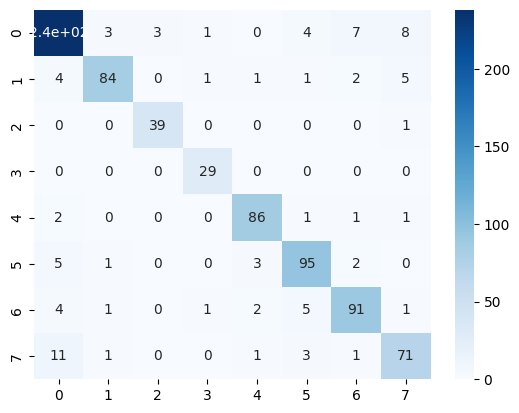

In [45]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model5 = DecisionTreeClassifier(min_samples_leaf=best_params5['min_samples_leaf'],max_depth=best_params5['max_depth'],criterion=best_params5['criterion'],random_state=0)
model5.fit(X_train_resampled, y_train_resampled)
y_pred10 = model5.predict(X_test)
cm = confusion_matrix(y_test, y_pred10)
print(cm)
sns.heatmap(cm,annot= True, cmap = "Blues")
accuracy = accuracy_score(y_test, y_pred10)
print(accuracy)
print(classification_report(y_test, y_pred10))
print("precision score", precision_score(y_test, y_pred10, average='weighted')) # Change is here
print("Recall score", recall_score(y_test, y_pred10, average='weighted')) # Change is here
print("f1 score", f1_score(y_test, y_pred10, average='weighted')) # Change is here
print("accuracy score", accuracy_score(y_test,y_pred10))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2587, in log_loss
    y_pred = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    ar

Cross-validation metrics:
Cross Accuracy: 0.7207643463295947
Cross Precision: 0.7220736526684038
Cross Recall: 0.7207643463295947
Cross F1 Score: 0.7195829862911294
Cross MCC: 0.6624016139716037
Cross Kappa: 0.6617690207769066
Cross Log-Loss: nan


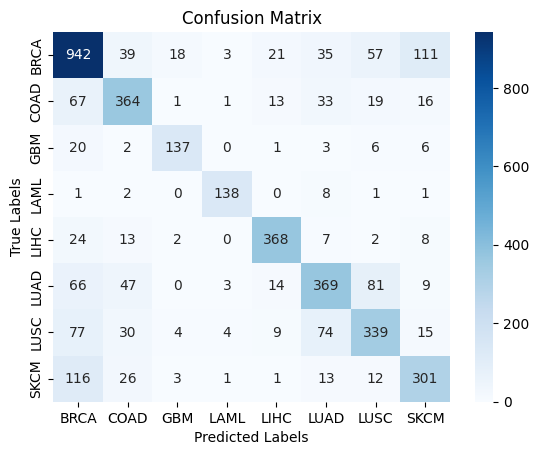

In [46]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, log_loss
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define scoring metrics for 3-class problem
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),  # Weighted for multi-class
    'recall': make_scorer(recall_score, average='weighted'),        # Weighted for multi-class
    'f1_score': make_scorer(f1_score, average='weighted'),          # Weighted for multi-class
    'matthews_corrcoef': make_scorer(matthews_corrcoef),            # MCC works for multi-class directly
    'cohen_kappa_score': make_scorer(cohen_kappa_score),            # Works for multi-class
    'log_loss': make_scorer(log_loss, greater_is_better=False)      # Lower is better
}

# Perform cross-validation
results = cross_validate(
    estimator=model5,
    X=X,  # Feature matrix
    y=Y,  # Target labels
    cv=10,  # 10-fold cross-validation
    scoring=scoring
)

# Print cross-validation results
print('Cross-validation metrics:')
print('Cross Accuracy:', np.mean(results['test_accuracy']))
print('Cross Precision:', np.mean(results['test_precision']))
print('Cross Recall:', np.mean(results['test_recall']))
print('Cross F1 Score:', np.mean(results['test_f1_score']))
print('Cross MCC:', np.mean(results['test_matthews_corrcoef']))
print('Cross Kappa:', np.mean(results['test_cohen_kappa_score']))
print('Cross Log-Loss:', np.mean(results['test_log_loss']))

# Predict labels using cross-validation
y_pred1 = cross_val_predict(model5, X, Y, cv=10)

# Compute confusion matrix
conf_mat = confusion_matrix(Y, y_pred1)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2587, in log_loss
    y_pred = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    ar

Cross-validation metrics:
Cross Accuracy: 0.834554032401638
Cross Precision: 0.8395176068511864
Cross Recall: 0.834554032401638
Cross F1 Score: 0.8324919902448229
Cross MCC: 0.8004045819326937
Cross Kappa: 0.7982311949858327
Cross Log-Loss: nan


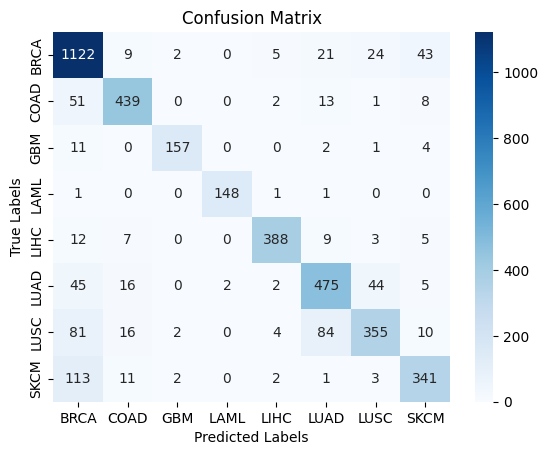

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, log_loss
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define scoring metrics for 3-class problem
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),  # Weighted for multi-class
    'recall': make_scorer(recall_score, average='weighted'),        # Weighted for multi-class
    'f1_score': make_scorer(f1_score, average='weighted'),          # Weighted for multi-class
    'matthews_corrcoef': make_scorer(matthews_corrcoef),            # MCC works for multi-class directly
    'cohen_kappa_score': make_scorer(cohen_kappa_score),            # Works for multi-class
    'log_loss': make_scorer(log_loss, greater_is_better=False)      # Lower is better
}

# Perform cross-validation
results = cross_validate(
    estimator=rf_model,
    X=X,  # Feature matrix
    y=Y,  # Target labels
    cv=10,  # 10-fold cross-validation
    scoring=scoring
)

# Print cross-validation results
print('Cross-validation metrics:')
print('Cross Accuracy:', np.mean(results['test_accuracy']))
print('Cross Precision:', np.mean(results['test_precision']))
print('Cross Recall:', np.mean(results['test_recall']))
print('Cross F1 Score:', np.mean(results['test_f1_score']))
print('Cross MCC:', np.mean(results['test_matthews_corrcoef']))
print('Cross Kappa:', np.mean(results['test_cohen_kappa_score']))
print('Cross Log-Loss:', np.mean(results['test_log_loss']))

# Predict labels using cross-validation
y_pred1 = cross_val_predict(rf_model, X, Y, cv=10)

# Compute confusion matrix
conf_mat = confusion_matrix(Y, y_pred1)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

In [49]:
et_model = ExtraTreesClassifier(random_state=42, n_estimators=100)
et_model.fit(X_train_resampled, y_train_resampled)

ExtraTreesClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2587, in log_loss
    y_pred = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    ar

Cross-validation metrics:
Cross Accuracy: 0.838214942733369
Cross Precision: 0.8465782485528466
Cross Recall: 0.838214942733369
Cross F1 Score: 0.8357740776509122
Cross MCC: 0.8054351203995468
Cross Kappa: 0.8021346598741094
Cross Log-Loss: nan


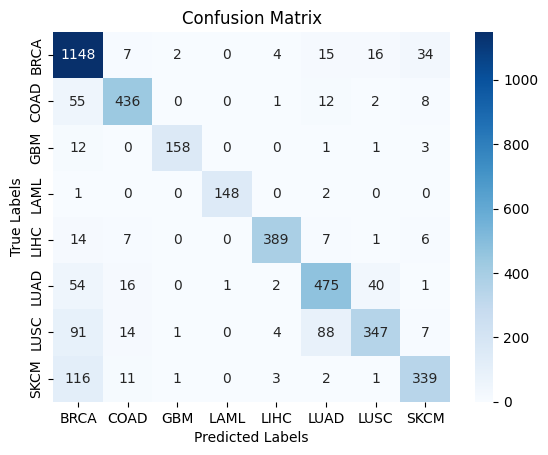

In [50]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, log_loss
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define scoring metrics for 3-class problem
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),  # Weighted for multi-class
    'recall': make_scorer(recall_score, average='weighted'),        # Weighted for multi-class
    'f1_score': make_scorer(f1_score, average='weighted'),          # Weighted for multi-class
    'matthews_corrcoef': make_scorer(matthews_corrcoef),            # MCC works for multi-class directly
    'cohen_kappa_score': make_scorer(cohen_kappa_score),            # Works for multi-class
    'log_loss': make_scorer(log_loss, greater_is_better=False)      # Lower is better
}

# Perform cross-validation
results = cross_validate(
    estimator=et_model,
    X=X,  # Feature matrix
    y=Y,  # Target labels
    cv=10,  # 10-fold cross-validation
    scoring=scoring
)

# Print cross-validation results
print('Cross-validation metrics:')
print('Cross Accuracy:', np.mean(results['test_accuracy']))
print('Cross Precision:', np.mean(results['test_precision']))
print('Cross Recall:', np.mean(results['test_recall']))
print('Cross F1 Score:', np.mean(results['test_f1_score']))
print('Cross MCC:', np.mean(results['test_matthews_corrcoef']))
print('Cross Kappa:', np.mean(results['test_cohen_kappa_score']))
print('Cross Log-Loss:', np.mean(results['test_log_loss']))

# Predict labels using cross-validation
y_pred1 = cross_val_predict(et_model, X, Y, cv=10)

# Compute confusion matrix
conf_mat = confusion_matrix(Y, y_pred1)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
from sklearn.ensemble import StackingClassifier
estimators = [('RF', rf_model),('ET',et_model ),('LR',lr_model)]
stackclassifier = StackingClassifier(estimators=estimators, final_estimator=svm_model)

In [61]:
stackclassifier.fit(X_train_resampled,y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('ET', ExtraTreesClassifier(random_state=42)),
                               ('LR', LogisticRegression(random_state=42))],
                   final_estimator=SVC(class_weight='balanced',
                                       random_state=42))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation metrics:
Cross Accuracy: 0.8450299685478606
Cross Precision: 0.8506519827463009
Cross Recall: 0.8450299685478606
Cross F1 Score: 0.8450325557557725
Cross MCC: 0.8148667148034008
Cross Kappa: 0.8138421082847863
Cross Log-Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

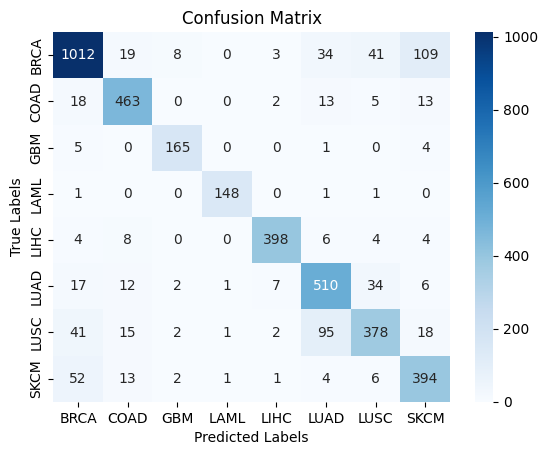

In [62]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, log_loss
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define scoring metrics for multi-class problem
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),  # Weighted for multi-class
    'recall': make_scorer(recall_score, average='weighted'),        # Weighted for multi-class
    'f1_score': make_scorer(f1_score, average='weighted'),          # Weighted for multi-class
    'matthews_corrcoef': make_scorer(matthews_corrcoef),            # MCC works for multi-class directly
    'cohen_kappa_score': make_scorer(cohen_kappa_score),            # Works for multi-class
    'log_loss': make_scorer(log_loss, greater_is_better=False)      # Lower is better
}

# Perform cross-validation
results = cross_validate(
    estimator=stackclassifier,
    X=X,  # Feature matrix
    y=Y,  # Target labels
    cv=10,  # 10-fold cross-validation
    scoring=scoring
)

# Print cross-validation results
print('Cross-validation metrics:')
print('Cross Accuracy:', np.mean(results['test_accuracy']))
print('Cross Precision:', np.mean(results['test_precision']))
print('Cross Recall:', np.mean(results['test_recall']))
print('Cross F1 Score:', np.mean(results['test_f1_score']))
print('Cross MCC:', np.mean(results['test_matthews_corrcoef']))
print('Cross Kappa:', np.mean(results['test_cohen_kappa_score']))
print('Cross Log-Loss:', np.mean(results['test_log_loss']))

# Predict labels using cross-validation
y_pred1 = cross_val_predict(stackclassifier, X, Y, cv=10)

# Compute confusion matrix
conf_mat = confusion_matrix(Y, y_pred1)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
from sklearn.ensemble import VotingClassifier
eclfs = VotingClassifier(estimators=[('RF', rf_model), ('ET', et_model), ('lr', lr_model)],voting='soft')

In [64]:
eclfs.fit(X_train_resampled,y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('ET', ExtraTreesClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42))],
                 voting='soft')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282

Cross-validation metrics:
Cross Accuracy: 0.8404029434454928
Cross Precision: 0.8439960223649996
Cross Recall: 0.8404029434454928
Cross F1 Score: 0.8382510736138673
Cross MCC: 0.8075041679741096
Cross Kappa: 0.8056434123572135
Cross Log-Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

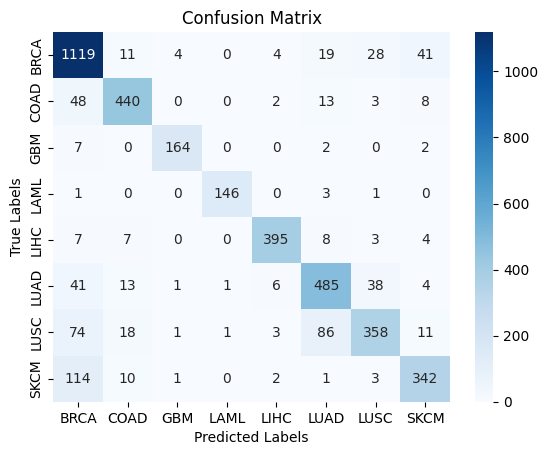

In [65]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score, log_loss
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define scoring metrics for 3-class problem
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),  # Weighted for multi-class
    'recall': make_scorer(recall_score, average='weighted'),        # Weighted for multi-class
    'f1_score': make_scorer(f1_score, average='weighted'),          # Weighted for multi-class
    'matthews_corrcoef': make_scorer(matthews_corrcoef),            # MCC works for multi-class directly
    'cohen_kappa_score': make_scorer(cohen_kappa_score),            # Works for multi-class
    'log_loss': make_scorer(log_loss, greater_is_better=False)      # Lower is better
}

# Perform cross-validation
results = cross_validate(
    estimator=eclfs,
    X=X,  # Feature matrix
    y=Y,  # Target labels
    cv=10,  # 10-fold cross-validation
    scoring=scoring
)

# Print cross-validation results
print('Cross-validation metrics:')
print('Cross Accuracy:', np.mean(results['test_accuracy']))
print('Cross Precision:', np.mean(results['test_precision']))
print('Cross Recall:', np.mean(results['test_recall']))
print('Cross F1 Score:', np.mean(results['test_f1_score']))
print('Cross MCC:', np.mean(results['test_matthews_corrcoef']))
print('Cross Kappa:', np.mean(results['test_cohen_kappa_score']))
print('Cross Log-Loss:', np.mean(results['test_log_loss']))

# Predict labels using cross-validation
y_pred1 = cross_val_predict(eclfs, X, Y, cv=10)

# Compute confusion matrix
conf_mat = confusion_matrix(Y, y_pred1)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()